In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

In [2]:
data = pd.read_csv('dataset_thefork-scraper_2023-09-28_15-50-15-855.csv')

In [3]:
list(data.columns)

['address',
 'averagePrice',
 'chefName',
 'cuisine',
 'currency',
 'customerPhotos/0',
 'customerPhotos/1',
 'customerPhotos/2',
 'customerPhotos/3',
 'customerPhotos/4',
 'customerPhotos/5',
 'customerPhotos/6',
 'customerPhotos/7',
 'customerPhotos/8',
 'customerPhotos/9',
 'customerPhotos/10',
 'customerPhotos/11',
 'customerPhotos/12',
 'customerPhotos/13',
 'customerPhotos/14',
 'customerPhotos/15',
 'customerPhotos/16',
 'customerPhotos/17',
 'customerPhotos/18',
 'customerPhotos/19',
 'description',
 'hasLoyaltyProgram',
 'isBookable',
 'latitude',
 'location',
 'longitude',
 'maxPartySize',
 'name',
 'offer',
 'openingHours',
 'paymentAccepted/0',
 'paymentAccepted/1',
 'paymentAccepted/2',
 'paymentAccepted/3',
 'paymentAccepted/4',
 'paymentAccepted/5',
 'paymentAccepted/6',
 'paymentAccepted/7',
 'paymentAccepted/8',
 'paymentAccepted/9',
 'phone',
 'photo',
 'photos/0',
 'photos/1',
 'photos/2',
 'photos/3',
 'photos/4',
 'photos/5',
 'photos/6',
 'photos/7',
 'photos/8',


In [4]:
filtered = data[['address',
 'averagePrice',
 'chefName',
 'cuisine',
 'currency', 'radius',
 'ratingValue',
 'reviewCount','style', 'phone',
 'photo', 'description',
 'hasLoyaltyProgram',
 'isBookable',
 'latitude',
 'location',
 'longitude',
 'maxPartySize',
 'name',
 'offer',
 'openingHours', 'url']]

In [5]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   address            868 non-null    object 
 1   averagePrice       868 non-null    int64  
 2   chefName           316 non-null    object 
 3   cuisine            868 non-null    object 
 4   currency           868 non-null    object 
 5   radius             868 non-null    int64  
 6   ratingValue        846 non-null    float64
 7   reviewCount        863 non-null    float64
 8   style              826 non-null    object 
 9   phone              559 non-null    float64
 10  photo              868 non-null    object 
 11  description        13 non-null     object 
 12  hasLoyaltyProgram  868 non-null    bool   
 13  isBookable         868 non-null    bool   
 14  latitude           868 non-null    float64
 15  location           868 non-null    object 
 16  longitude          868 non

In [6]:
filtered

,address,averagePrice,chefName,cuisine,currency,radius,ratingValue,reviewCount,style,phone,...,description,hasLoyaltyProgram,isBookable,latitude,location,longitude,maxPartySize,name,offer,openingHours
0,"Rua Correia Teles - 56,1350-102,Lisboa",20,NaN,Regional,EUR,3000,9.1,904.0,After work,NaN,...,NaN,False,True,38.722252,"Lisbon, Portugal",-9.139337,60.0,Moules & Gin Lisboa,30% off the 'a la carte' menu,Monday -\r\nTuesday 12:30 - 23:00\r\nWednesday...
1,"Rua Damasceno Monteiro - 106B,1170-113,Lisboa",18,NaN,Pizzeria,EUR,3000,9.7,6.0,Good for families,3.519201e+11,...,NaN,False,True,38.722252,"Lisbon, Portugal",-9.139337,NaN,Il Pizzavendolo,50% off the 'a la carte' menu,Monday 16:00 - 23:30\r\nTuesday 16:00 - 23:30\...
2,"Calçada de São Vicente - 42,1100-213,Lisboa",25,NaN,Portuguese,EUR,3000,9.3,1181.0,After work,3.512189e+11,...,NaN,False,True,38.722252,"Lisbon, Portugal",-9.139337,4.0,Beco a Sério,-30% sobre a ementa!,Monday 19:00 - 23:00\r\nTuesday 19:00 - 23:00\...
3,"Rua Cruzes da Sé 5,1100-192,Lisboa",15,NaN,Portuguese,EUR,3000,8.8,1662.0,Live music,3.512189e+11,...,NaN,False,True,38.722252,"Lisbon, Portugal",-9.139337,4.0,Caso Sério,Promoção 30%,Monday 19:00 - 23:00\r\nTuesday 19:00 - 23:00\...
4,"Rua da Sociedade Farmacêutica - 20A,1150-340,L...",15,NaN,Portuguese,EUR,3000,9.1,1008.0,After work,3.519276e+11,...,NaN,False,True,38.722252,"Lisbon, Portugal",-9.139337,70.0,111 Vinhos - Marquês,50% off the 'a la carte' menu,Monday -\r\nTuesday 16:00 - 23:30\r\nWednesday...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,"R. da Oliveira ao Carmo, 47,1200-309,Lisboa",25,SANGUEDO,Portuguese,EUR,3000,NaN,26.0,NaN,3.512109e+11,...,NaN,False,False,38.722252,"Lisbon, Portugal",-9.139337,55.0,Lábios de Mosto,NaN,Monday 16:00 - 01:00\r\nTuesday 16:00 - 01:00\...
864,"Av. Elias Garcia 147A,1050-102,Lisboa",15,NaN,Asian,EUR,3000,8.6,744.0,After work,3.512180e+11,...,NaN,False,True,38.722252,"Lisbon, Portugal",-9.139337,NaN,Seoul K BBQ,NaN,"Monday 12:00 - 15:00, 19:00 - 23:00\r\nTuesday..."
865,"Rua dos Lusiadas 68-72,1300-305,Lisboa",35,NaN,Portuguese,EUR,3000,8.8,1200.0,After work,3.512136e+11,...,NaN,False,True,38.722252,"Lisbon, Portugal",-9.139337,20.0,Solar dos Nunes,NaN,"Monday 12:00 - 15:00, 19:00 - 22:30\r\nTuesday..."
866,"Rua António Alçada Baptista - 5,1500-911,Lisboa",15,NaN,International,EUR,3000,9.0,165.0,After work,3.512115e+11,...,NaN,False,True,38.722252,"Lisbon, Portugal",-9.139337,60.0,STAY by Upon Lisbon,NaN,Monday 12:30 - 22:30\r\nTuesday 12:30 - 22:30\...


In [7]:
filtered['chefName'].replace(np.nan, "NA", inplace=True)

C:\Users\carolinashaul\AppData\Local\Temp\ipykernel_19392\2095964814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['chefName'].replace(np.nan, "NA", inplace=True)


In [8]:
filtered.isnull().any()

address              False
averagePrice         False
chefName             False
cuisine              False
currency             False
radius               False
ratingValue           True
reviewCount           True
style                 True
phone                 True
photo                False
description           True
hasLoyaltyProgram    False
isBookable           False
latitude             False
location             False
longitude            False
maxPartySize          True
name                 False
offer                 True
openingHours          True
dtype: bool

In [9]:
filtered.drop(['radius', 'latitude', 'longitude'], axis=1, inplace=True)

C:\Users\carolinashaul\AppData\Local\Temp\ipykernel_19392\2697115822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.drop(['radius', 'latitude', 'longitude'], axis=1, inplace=True)


In [10]:
filtered['oH1'] = filtered['openingHours'].map(lambda x: str(x).split('\r\n'))

C:\Users\carolinashaul\AppData\Local\Temp\ipykernel_19392\1819831417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['oH1'] = filtered['openingHours'].map(lambda x: str(x).split('\r\n'))


In [11]:
def clean_openinghours(observation):
    opening_hours_dict = {}
    for day in observation:
        day_week = f'{day.partition("y")[0]}y'
        opening_hours_dict[day_week] = day.partition("y")[2].strip()
    return opening_hours_dict


In [12]:
filtered['oH2'] = filtered['oH1'].map(lambda x: clean_openinghours(x))

C:\Users\carolinashaul\AppData\Local\Temp\ipykernel_19392\4245085563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['oH2'] = filtered['oH1'].map(lambda x: clean_openinghours(x))


In [13]:
filtered[['openingHours', 'oH1', 'oH2']]

,openingHours,oH1,oH2
0,Monday -\r\nTuesday 12:30 - 23:00\r\nWednesday...,"[Monday -, Tuesday 12:30 - 23:00, Wednesday 12...","{'Monday': '-', 'Tuesday': '12:30 - 23:00', 'W..."
1,Monday 16:00 - 23:30\r\nTuesday 16:00 - 23:30\...,"[Monday 16:00 - 23:30, Tuesday 16:00 - 23:30, ...","{'Monday': '16:00 - 23:30', 'Tuesday': '16:00 ..."
2,Monday 19:00 - 23:00\r\nTuesday 19:00 - 23:00\...,"[Monday 19:00 - 23:00, Tuesday 19:00 - 23:00, ...","{'Monday': '19:00 - 23:00', 'Tuesday': '19:00 ..."
3,Monday 19:00 - 23:00\r\nTuesday 19:00 - 23:00\...,"[Monday 19:00 - 23:00, Tuesday 19:00 - 23:00, ...","{'Monday': '19:00 - 23:00', 'Tuesday': '19:00 ..."
4,Monday -\r\nTuesday 16:00 - 23:30\r\nWednesday...,"[Monday -, Tuesday 16:00 - 23:30, Wednesday 16...","{'Monday': '-', 'Tuesday': '16:00 - 23:30', 'W..."
...,...,...,...
863,Monday 16:00 - 01:00\r\nTuesday 16:00 - 01:00\...,"[Monday 16:00 - 01:00, Tuesday 16:00 - 01:00, ...","{'Monday': '16:00 - 01:00', 'Tuesday': '16:00 ..."
864,"Monday 12:00 - 15:00, 19:00 - 23:00\r\nTuesday...","[Monday 12:00 - 15:00, 19:00 - 23:00, Tuesday ...","{'Monday': '12:00 - 15:00, 19:00 - 23:00', 'Tu..."
865,"Monday 12:00 - 15:00, 19:00 - 22:30\r\nTuesday...","[Monday 12:00 - 15:00, 19:00 - 22:30, Tuesday ...","{'Monday': '12:00 - 15:00, 19:00 - 22:30', 'Tu..."
866,Monday 12:30 - 22:30\r\nTuesday 12:30 - 22:30\...,"[Monday 12:30 - 22:30, Tuesday 12:30 - 22:30, ...","{'Monday': '12:30 - 22:30', 'Tuesday': '12:30 ..."


In [14]:
filtered.drop(['openingHours', 'oH1'], axis=1, inplace=True)

C:\Users\carolinashaul\AppData\Local\Temp\ipykernel_19392\2655342360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.drop(['openingHours', 'oH1'], axis=1, inplace=True)


In [15]:
filtered.drop(['description'], axis=1, inplace=True)

C:\Users\carolinashaul\AppData\Local\Temp\ipykernel_19392\2015308842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.drop(['description'], axis=1, inplace=True)


In [16]:
filtered.isnull().any()

address              False
averagePrice         False
chefName             False
cuisine              False
currency             False
ratingValue           True
reviewCount           True
style                 True
phone                 True
photo                False
hasLoyaltyProgram    False
isBookable           False
location             False
maxPartySize          True
name                 False
offer                 True
oH2                  False
dtype: bool

In [17]:
filtered['offerBool'] = np.where(filtered['offer'].isnull(), 0, 1)

C:\Users\carolinashaul\AppData\Local\Temp\ipykernel_19392\143172960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['offerBool'] = np.where(filtered['offer'].isnull(), 0, 1)


In [18]:
filtered

,address,averagePrice,chefName,cuisine,currency,ratingValue,reviewCount,style,phone,photo,hasLoyaltyProgram,isBookable,location,maxPartySize,name,offer,oH2,offerBool
0,"Rua Correia Teles - 56,1350-102,Lisboa",20,NA,Regional,EUR,9.1,904.0,After work,NaN,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",60.0,Moules & Gin Lisboa,30% off the 'a la carte' menu,"{'Monday': '-', 'Tuesday': '12:30 - 23:00', 'W...",1
1,"Rua Damasceno Monteiro - 106B,1170-113,Lisboa",18,NA,Pizzeria,EUR,9.7,6.0,Good for families,3.519201e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Il Pizzavendolo,50% off the 'a la carte' menu,"{'Monday': '16:00 - 23:30', 'Tuesday': '16:00 ...",1
2,"Calçada de São Vicente - 42,1100-213,Lisboa",25,NA,Portuguese,EUR,9.3,1181.0,After work,3.512189e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",4.0,Beco a Sério,-30% sobre a ementa!,"{'Monday': '19:00 - 23:00', 'Tuesday': '19:00 ...",1
3,"Rua Cruzes da Sé 5,1100-192,Lisboa",15,NA,Portuguese,EUR,8.8,1662.0,Live music,3.512189e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",4.0,Caso Sério,Promoção 30%,"{'Monday': '19:00 - 23:00', 'Tuesday': '19:00 ...",1
4,"Rua da Sociedade Farmacêutica - 20A,1150-340,L...",15,NA,Portuguese,EUR,9.1,1008.0,After work,3.519276e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",70.0,111 Vinhos - Marquês,50% off the 'a la carte' menu,"{'Monday': '-', 'Tuesday': '16:00 - 23:30', 'W...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,"R. da Oliveira ao Carmo, 47,1200-309,Lisboa",25,SANGUEDO,Portuguese,EUR,NaN,26.0,NaN,3.512109e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,False,"Lisbon, Portugal",55.0,Lábios de Mosto,NaN,"{'Monday': '16:00 - 01:00', 'Tuesday': '16:00 ...",0
864,"Av. Elias Garcia 147A,1050-102,Lisboa",15,NA,Asian,EUR,8.6,744.0,After work,3.512180e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Seoul K BBQ,NaN,"{'Monday': '12:00 - 15:00, 19:00 - 23:00', 'Tu...",0
865,"Rua dos Lusiadas 68-72,1300-305,Lisboa",35,NA,Portuguese,EUR,8.8,1200.0,After work,3.512136e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",20.0,Solar dos Nunes,NaN,"{'Monday': '12:00 - 15:00, 19:00 - 22:30', 'Tu...",0
866,"Rua António Alçada Baptista - 5,1500-911,Lisboa",15,NA,International,EUR,9.0,165.0,After work,3.512115e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",60.0,STAY by Upon Lisbon,NaN,"{'Monday': '12:30 - 22:30', 'Tuesday': '12:30 ...",0


In [19]:
filtered['offer'].replace(np.nan, "Nenhuma oferta", inplace=True)

C:\Users\carolinashaul\AppData\Local\Temp\ipykernel_19392\2830056151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['offer'].replace(np.nan, "Nenhuma oferta", inplace=True)


In [20]:
filtered['offer'] = filtered['offer'].map(lambda x: x.strip())

C:\Users\carolinashaul\AppData\Local\Temp\ipykernel_19392\2972062941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['offer'] = filtered['offer'].map(lambda x: x.strip())


In [21]:
filtered['offer'].unique()

array(["30% off the 'a la carte' menu", "50% off the 'a la carte' menu",
       '-30% sobre a ementa!', 'Promoção 30%', 'Menu Experience €140',
       'Nenhuma oferta', 'Menu de Almoço - Quinta-feira €18',
       '-40% sobre a ementa, excepto menus e bebidas!',
       '-50% sobre a ementa!', 'Promoção de 30%',
       "40% off the 'a la carte' menu", 'Menu Executivo - 2a a 6a €24',
       '-30%  sobre a ementa, excluindo bebidas!',
       'Menu de Almoço / Lunch Menu €25', 'Menu Nau São Cristóvão €100',
       'Menu Executivo Vegan €40',
       'Menu Omakase - Experiência do Chef €60',
       'MENU JANTAR + ESPECTÁCULO  €60', 'Menu de Almoço  €25',
       'Afternoon Tea (menu à la carte sem preço fixo) €35',
       '-30% sobre o cardápio, excluindo bebidas!',
       'Chá da Tarde de Verão do Myriad €48',
       'MENU RENTRÉE (Exclusivo Reservas On-Line) €95',
       'Menu don tancredi falconeri\n  €60', 'Menu Jardim €135',
       'Menu de Almoço €19', 'MENU EXECUTIVO  €18', 'Menu Grupo 

In [22]:
filtered.isnull().any()

address              False
averagePrice         False
chefName             False
cuisine              False
currency             False
ratingValue           True
reviewCount           True
style                 True
phone                 True
photo                False
hasLoyaltyProgram    False
isBookable           False
location             False
maxPartySize          True
name                 False
offer                False
oH2                  False
offerBool            False
dtype: bool

In [35]:
filtered[['maxPartySize', 'ratingValue', 'averagePrice', 'style', 'cuisine']]

,maxPartySize,ratingValue,averagePrice,style,cuisine
0,60.0,9.1,20,After work,Regional
1,NaN,9.7,18,Good for families,Pizzeria
2,4.0,9.3,25,After work,Portuguese
3,4.0,8.8,15,Live music,Portuguese
4,70.0,9.1,15,After work,Portuguese
...,...,...,...,...,...
863,55.0,NaN,25,NaN,Portuguese
864,NaN,8.6,15,After work,Asian
865,20.0,8.8,35,After work,Portuguese
866,60.0,9.0,15,After work,International


In [28]:
(filtered[filtered['maxPartySize'].isnull()])

,address,averagePrice,chefName,cuisine,currency,ratingValue,reviewCount,style,phone,photo,hasLoyaltyProgram,isBookable,location,maxPartySize,name,offer,oH2,offerBool
1,"Rua Damasceno Monteiro - 106B,1170-113,Lisboa",18,NA,Pizzeria,EUR,9.7,6.0,Good for families,3.519201e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Il Pizzavendolo,50% off the 'a la carte' menu,"{'Monday': '16:00 - 23:30', 'Tuesday': '16:00 ...",1
15,"R. Dom Domingos Jardo 19,1900-185,Lisboa",15,Zesan,Vegan cuisine,EUR,8.5,51.0,Good for families,NaN,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Vegan Pizzaria e Cozinha,50% off the 'a la carte' menu,"{'Monday': '12:00 - 01:00', 'Tuesday': '12:00 ...",1
23,"Largo São Martinho 10,1100-307,Lisboa",18,NA,Portuguese,EUR,8.1,98.0,Good for families,3.519374e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Taberna do Castelo,50% off the 'a la carte' menu,"{'Monday': '09:00 - 23:00', 'Tuesday': '09:00 ...",1
26,"Av. da Liberdade 36C,1250-145,Lisboa",28,NA,International food,EUR,NaN,1.0,After work,3.519323e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Bel Amour,50% off the 'a la carte' menu,"{'Monday': '-', 'Tuesday': '18:00 - 02:00', 'W...",1
43,"R. Ângela Pinto 40B,1900-069,Lisboa",14,David Luis,Pizzeria,EUR,8.0,97.0,Lunch,3.519206e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Pizzaria O’ Chessey,50% off the 'a la carte' menu,"{'Monday': '12:00 - 01:00', 'Tuesday': '12:00 ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,"Estrada da Luz 110A,1600-153,Lisboa",20,NA,Portuguese,EUR,8.6,87.0,Cosy,3.512183e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Rústico Luz,Nenhuma oferta,"{'Monday': '-', 'Tuesday': '-', 'Wednesday': '...",0
834,"Campo Grande 56,1700-093,Lisboa",34,Nelson Borges,Mediterranean,EUR,5.4,5.0,Author,3.519400e+11,https://res.cloudinary.com/tf-lab/image/upload...,True,True,"Lisbon, Portugal",NaN,Y Not LX,Pequeno Almoço Buffet €18,"{'Monday': '12:00 - 23:00', 'Tuesday': '12:00 ...",1
845,"R. Infantaria 16 2A,1250-248,Lisboa",14,Seban,Mexican,EUR,8.2,70.0,Central location,3.512119e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,No Mames Wey - Campo de Ourique,Nenhuma oferta,"{'Monday': '-', 'Tuesday': '12:00 - 22:00', 'W...",0
864,"Av. Elias Garcia 147A,1050-102,Lisboa",15,NA,Asian,EUR,8.6,744.0,After work,3.512180e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Seoul K BBQ,Nenhuma oferta,"{'Monday': '12:00 - 15:00, 19:00 - 23:00', 'Tu...",0


In [38]:
filtered.drop('currency', axis=1, inplace=True)

C:\Users\carolinashaul\AppData\Local\Temp\ipykernel_19392\2291434004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.drop('currency', axis=1, inplace=True)


In [39]:
filtered

,address,averagePrice,chefName,cuisine,ratingValue,reviewCount,style,phone,photo,hasLoyaltyProgram,isBookable,location,maxPartySize,name,offer,oH2,offerBool
0,"Rua Correia Teles - 56,1350-102,Lisboa",20,NA,Regional,9.1,904.0,After work,NaN,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",60.0,Moules & Gin Lisboa,30% off the 'a la carte' menu,"{'Monday': '-', 'Tuesday': '12:30 - 23:00', 'W...",1
1,"Rua Damasceno Monteiro - 106B,1170-113,Lisboa",18,NA,Pizzeria,9.7,6.0,Good for families,3.519201e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Il Pizzavendolo,50% off the 'a la carte' menu,"{'Monday': '16:00 - 23:30', 'Tuesday': '16:00 ...",1
2,"Calçada de São Vicente - 42,1100-213,Lisboa",25,NA,Portuguese,9.3,1181.0,After work,3.512189e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",4.0,Beco a Sério,-30% sobre a ementa!,"{'Monday': '19:00 - 23:00', 'Tuesday': '19:00 ...",1
3,"Rua Cruzes da Sé 5,1100-192,Lisboa",15,NA,Portuguese,8.8,1662.0,Live music,3.512189e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",4.0,Caso Sério,Promoção 30%,"{'Monday': '19:00 - 23:00', 'Tuesday': '19:00 ...",1
4,"Rua da Sociedade Farmacêutica - 20A,1150-340,L...",15,NA,Portuguese,9.1,1008.0,After work,3.519276e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",70.0,111 Vinhos - Marquês,50% off the 'a la carte' menu,"{'Monday': '-', 'Tuesday': '16:00 - 23:30', 'W...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,"R. da Oliveira ao Carmo, 47,1200-309,Lisboa",25,SANGUEDO,Portuguese,NaN,26.0,NaN,3.512109e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,False,"Lisbon, Portugal",55.0,Lábios de Mosto,Nenhuma oferta,"{'Monday': '16:00 - 01:00', 'Tuesday': '16:00 ...",0
864,"Av. Elias Garcia 147A,1050-102,Lisboa",15,NA,Asian,8.6,744.0,After work,3.512180e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Seoul K BBQ,Nenhuma oferta,"{'Monday': '12:00 - 15:00, 19:00 - 23:00', 'Tu...",0
865,"Rua dos Lusiadas 68-72,1300-305,Lisboa",35,NA,Portuguese,8.8,1200.0,After work,3.512136e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",20.0,Solar dos Nunes,Nenhuma oferta,"{'Monday': '12:00 - 15:00, 19:00 - 22:30', 'Tu...",0
866,"Rua António Alçada Baptista - 5,1500-911,Lisboa",15,NA,International,9.0,165.0,After work,3.512115e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",60.0,STAY by Upon Lisbon,Nenhuma oferta,"{'Monday': '12:30 - 22:30', 'Tuesday': '12:30 ...",0


In [40]:
filtered

,address,averagePrice,chefName,cuisine,ratingValue,reviewCount,style,phone,photo,hasLoyaltyProgram,isBookable,location,maxPartySize,name,offer,oH2,offerBool
0,"Rua Correia Teles - 56,1350-102,Lisboa",20,NA,Regional,9.1,904.0,After work,NaN,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",60.0,Moules & Gin Lisboa,30% off the 'a la carte' menu,"{'Monday': '-', 'Tuesday': '12:30 - 23:00', 'W...",1
1,"Rua Damasceno Monteiro - 106B,1170-113,Lisboa",18,NA,Pizzeria,9.7,6.0,Good for families,3.519201e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Il Pizzavendolo,50% off the 'a la carte' menu,"{'Monday': '16:00 - 23:30', 'Tuesday': '16:00 ...",1
2,"Calçada de São Vicente - 42,1100-213,Lisboa",25,NA,Portuguese,9.3,1181.0,After work,3.512189e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",4.0,Beco a Sério,-30% sobre a ementa!,"{'Monday': '19:00 - 23:00', 'Tuesday': '19:00 ...",1
3,"Rua Cruzes da Sé 5,1100-192,Lisboa",15,NA,Portuguese,8.8,1662.0,Live music,3.512189e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",4.0,Caso Sério,Promoção 30%,"{'Monday': '19:00 - 23:00', 'Tuesday': '19:00 ...",1
4,"Rua da Sociedade Farmacêutica - 20A,1150-340,L...",15,NA,Portuguese,9.1,1008.0,After work,3.519276e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",70.0,111 Vinhos - Marquês,50% off the 'a la carte' menu,"{'Monday': '-', 'Tuesday': '16:00 - 23:30', 'W...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,"R. da Oliveira ao Carmo, 47,1200-309,Lisboa",25,SANGUEDO,Portuguese,NaN,26.0,NaN,3.512109e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,False,"Lisbon, Portugal",55.0,Lábios de Mosto,Nenhuma oferta,"{'Monday': '16:00 - 01:00', 'Tuesday': '16:00 ...",0
864,"Av. Elias Garcia 147A,1050-102,Lisboa",15,NA,Asian,8.6,744.0,After work,3.512180e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Seoul K BBQ,Nenhuma oferta,"{'Monday': '12:00 - 15:00, 19:00 - 23:00', 'Tu...",0
865,"Rua dos Lusiadas 68-72,1300-305,Lisboa",35,NA,Portuguese,8.8,1200.0,After work,3.512136e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",20.0,Solar dos Nunes,Nenhuma oferta,"{'Monday': '12:00 - 15:00, 19:00 - 22:30', 'Tu...",0
866,"Rua António Alçada Baptista - 5,1500-911,Lisboa",15,NA,International,9.0,165.0,After work,3.512115e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",60.0,STAY by Upon Lisbon,Nenhuma oferta,"{'Monday': '12:30 - 22:30', 'Tuesday': '12:30 ...",0


In [46]:
filtered2 = filtered.dropna(subset=['ratingValue'])

In [47]:
filtered2

,address,averagePrice,chefName,cuisine,ratingValue,reviewCount,style,phone,photo,hasLoyaltyProgram,isBookable,location,maxPartySize,name,offer,oH2,offerBool
0,"Rua Correia Teles - 56,1350-102,Lisboa",20,NA,Regional,9.1,904.0,After work,NaN,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",60.0,Moules & Gin Lisboa,30% off the 'a la carte' menu,"{'Monday': '-', 'Tuesday': '12:30 - 23:00', 'W...",1
1,"Rua Damasceno Monteiro - 106B,1170-113,Lisboa",18,NA,Pizzeria,9.7,6.0,Good for families,3.519201e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Il Pizzavendolo,50% off the 'a la carte' menu,"{'Monday': '16:00 - 23:30', 'Tuesday': '16:00 ...",1
2,"Calçada de São Vicente - 42,1100-213,Lisboa",25,NA,Portuguese,9.3,1181.0,After work,3.512189e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",4.0,Beco a Sério,-30% sobre a ementa!,"{'Monday': '19:00 - 23:00', 'Tuesday': '19:00 ...",1
3,"Rua Cruzes da Sé 5,1100-192,Lisboa",15,NA,Portuguese,8.8,1662.0,Live music,3.512189e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",4.0,Caso Sério,Promoção 30%,"{'Monday': '19:00 - 23:00', 'Tuesday': '19:00 ...",1
4,"Rua da Sociedade Farmacêutica - 20A,1150-340,L...",15,NA,Portuguese,9.1,1008.0,After work,3.519276e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",70.0,111 Vinhos - Marquês,50% off the 'a la carte' menu,"{'Monday': '-', 'Tuesday': '16:00 - 23:30', 'W...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,"Tv. Bica Grande 6,1200-058,Lisboa",20,NA,Portuguese,7.9,29.0,Contemporary cuisine,3.512160e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",60.0,Tabica Bistrô,Nenhuma oferta,"{'Monday': '18:00 - 22:30', 'Tuesday': '13:00 ...",0
864,"Av. Elias Garcia 147A,1050-102,Lisboa",15,NA,Asian,8.6,744.0,After work,3.512180e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Seoul K BBQ,Nenhuma oferta,"{'Monday': '12:00 - 15:00, 19:00 - 23:00', 'Tu...",0
865,"Rua dos Lusiadas 68-72,1300-305,Lisboa",35,NA,Portuguese,8.8,1200.0,After work,3.512136e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",20.0,Solar dos Nunes,Nenhuma oferta,"{'Monday': '12:00 - 15:00, 19:00 - 22:30', 'Tu...",0
866,"Rua António Alçada Baptista - 5,1500-911,Lisboa",15,NA,International,9.0,165.0,After work,3.512115e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",60.0,STAY by Upon Lisbon,Nenhuma oferta,"{'Monday': '12:30 - 22:30', 'Tuesday': '12:30 ...",0


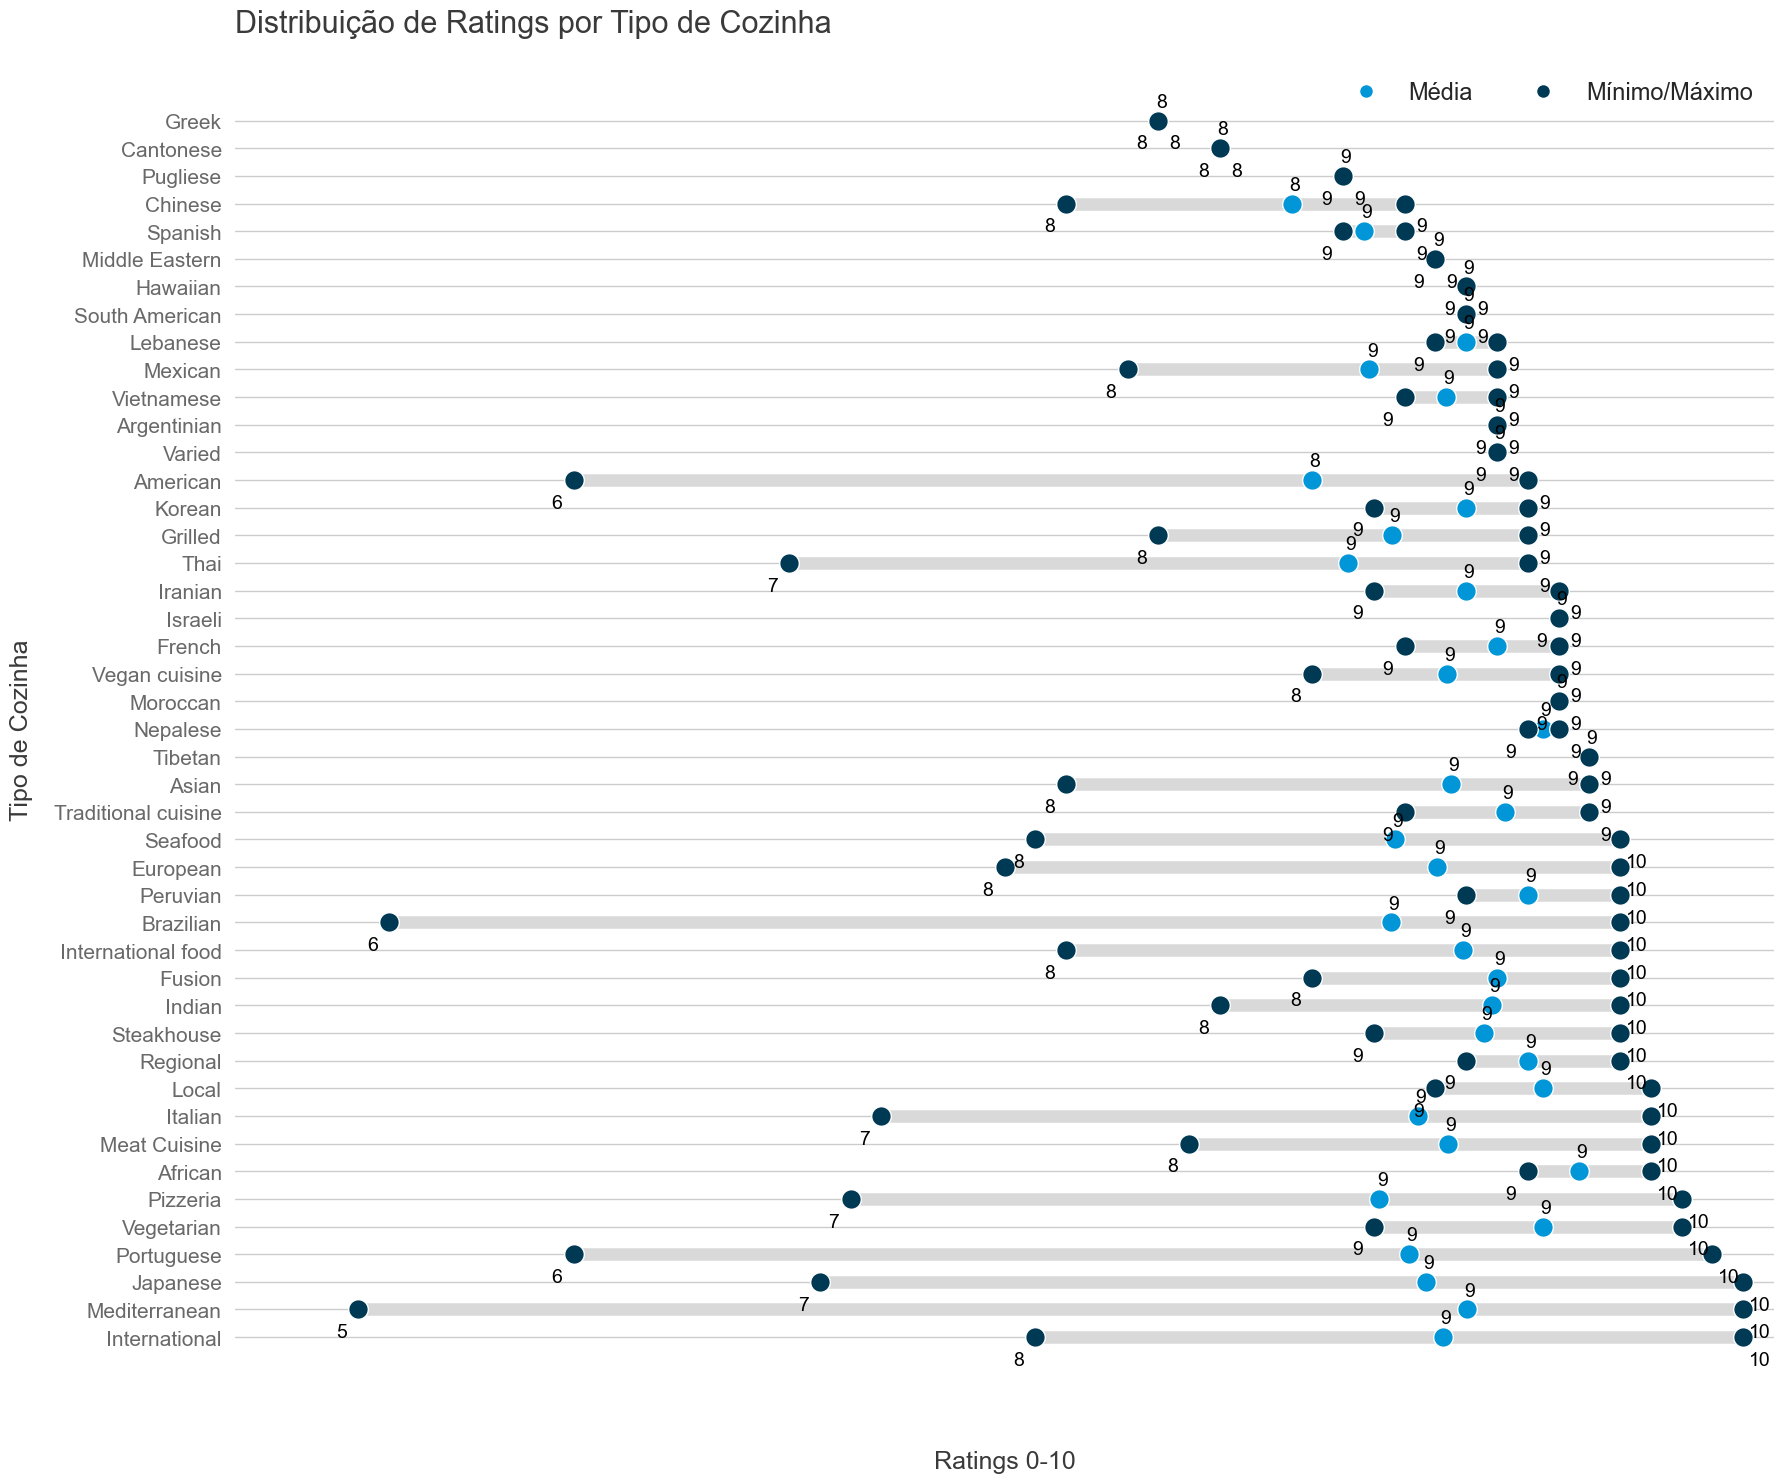

In [60]:
sns.set(style="white")  
df = filtered2.groupby('cuisine')['ratingValue'].agg(['min', 'mean', 'max']).sort_values(by='max', ascending=False)

plt.figure(figsize=(18, 15))
y_range = np.arange(1, len(df.index) + 1)
colors = np.where(df['max'] > df['mean'], '#d9d9d9', '#d57883')
main_text = '#3A3A3A'

plt.hlines(y=y_range, xmin=df['max'], xmax=df['mean'],
           color=colors, lw=9)
plt.hlines(y=y_range, xmin=df['min'], xmax=df['mean'],
           color=colors, lw=9)

for i in range(1, df.shape[0]+1):
    plt.plot([-2, 12], [i,i], linewidth=1, color='grey', alpha=0.4, zorder=0)
   
    
plt.scatter(df['mean'], y_range, color='#0096d7', s=200, label='Média', zorder=3, edgecolors='white')


plt.scatter(df['max'], y_range, color='#003953', s=200, label='Máximo', zorder=3, edgecolors='white')

plt.scatter(df['min'], y_range, color='#003953', s=200, label='Mínimo', zorder=3, edgecolors='white')

for mean_val, y in zip(df['mean'], y_range):
    plt.annotate(f'{mean_val:.0f}', (mean_val, y), textcoords="offset points",
                 xytext=(2, 10), ha='center', fontsize=14, color='black')

for max_val, y in zip(df['max'], y_range):
    plt.annotate(f'{max_val:.0f}', (max_val, y), textcoords="offset points",
                 xytext=(12, -20), ha='center', fontsize=14, color='black')

for min_val, y in zip(df['min'], y_range):
    plt.annotate(f'{min_val:.0f}', (min_val, y), textcoords="offset points",
                 xytext=(-12, -20), ha='center', fontsize=14, color='black')

legend_labels = ['Média', 'Mínimo/Máximo']
legend_markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#0096d7', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#003953', markersize=10)]
plt.legend(legend_markers, legend_labels, ncol=2, bbox_to_anchor=(1., 1.), loc="upper right", frameon=False, fontsize=17)


plt.yticks(y_range, [label.replace(' e ', '\ne ') for label in df.index], fontsize=15, color='dimgrey')

plt.title("Distribuição de Ratings por Tipo de Cozinha",
          loc='left', fontsize=22, pad=20,  fontname='Arial', weight='light', color=main_text, wrap=False)


plt.xlim(5, 10)
plt.xticks(np.arange(5, 10), fontsize=14, color='white')  

xlabel_text = plt.xlabel('Ratings 0-10', labelpad=15, fontsize=18, color=main_text)
xlabel_text.set_position((0.5, -0.1))  
ylabel_text = plt.ylabel('Tipo de Cozinha', labelpad=15, fontsize=18, color=main_text)
ylabel_text.set_position((-0.1, 0.5))  
sns.despine(left=True, bottom=True)

# plt.gcf().subplots_adjust()
plt.tight_layout()

plt.show()


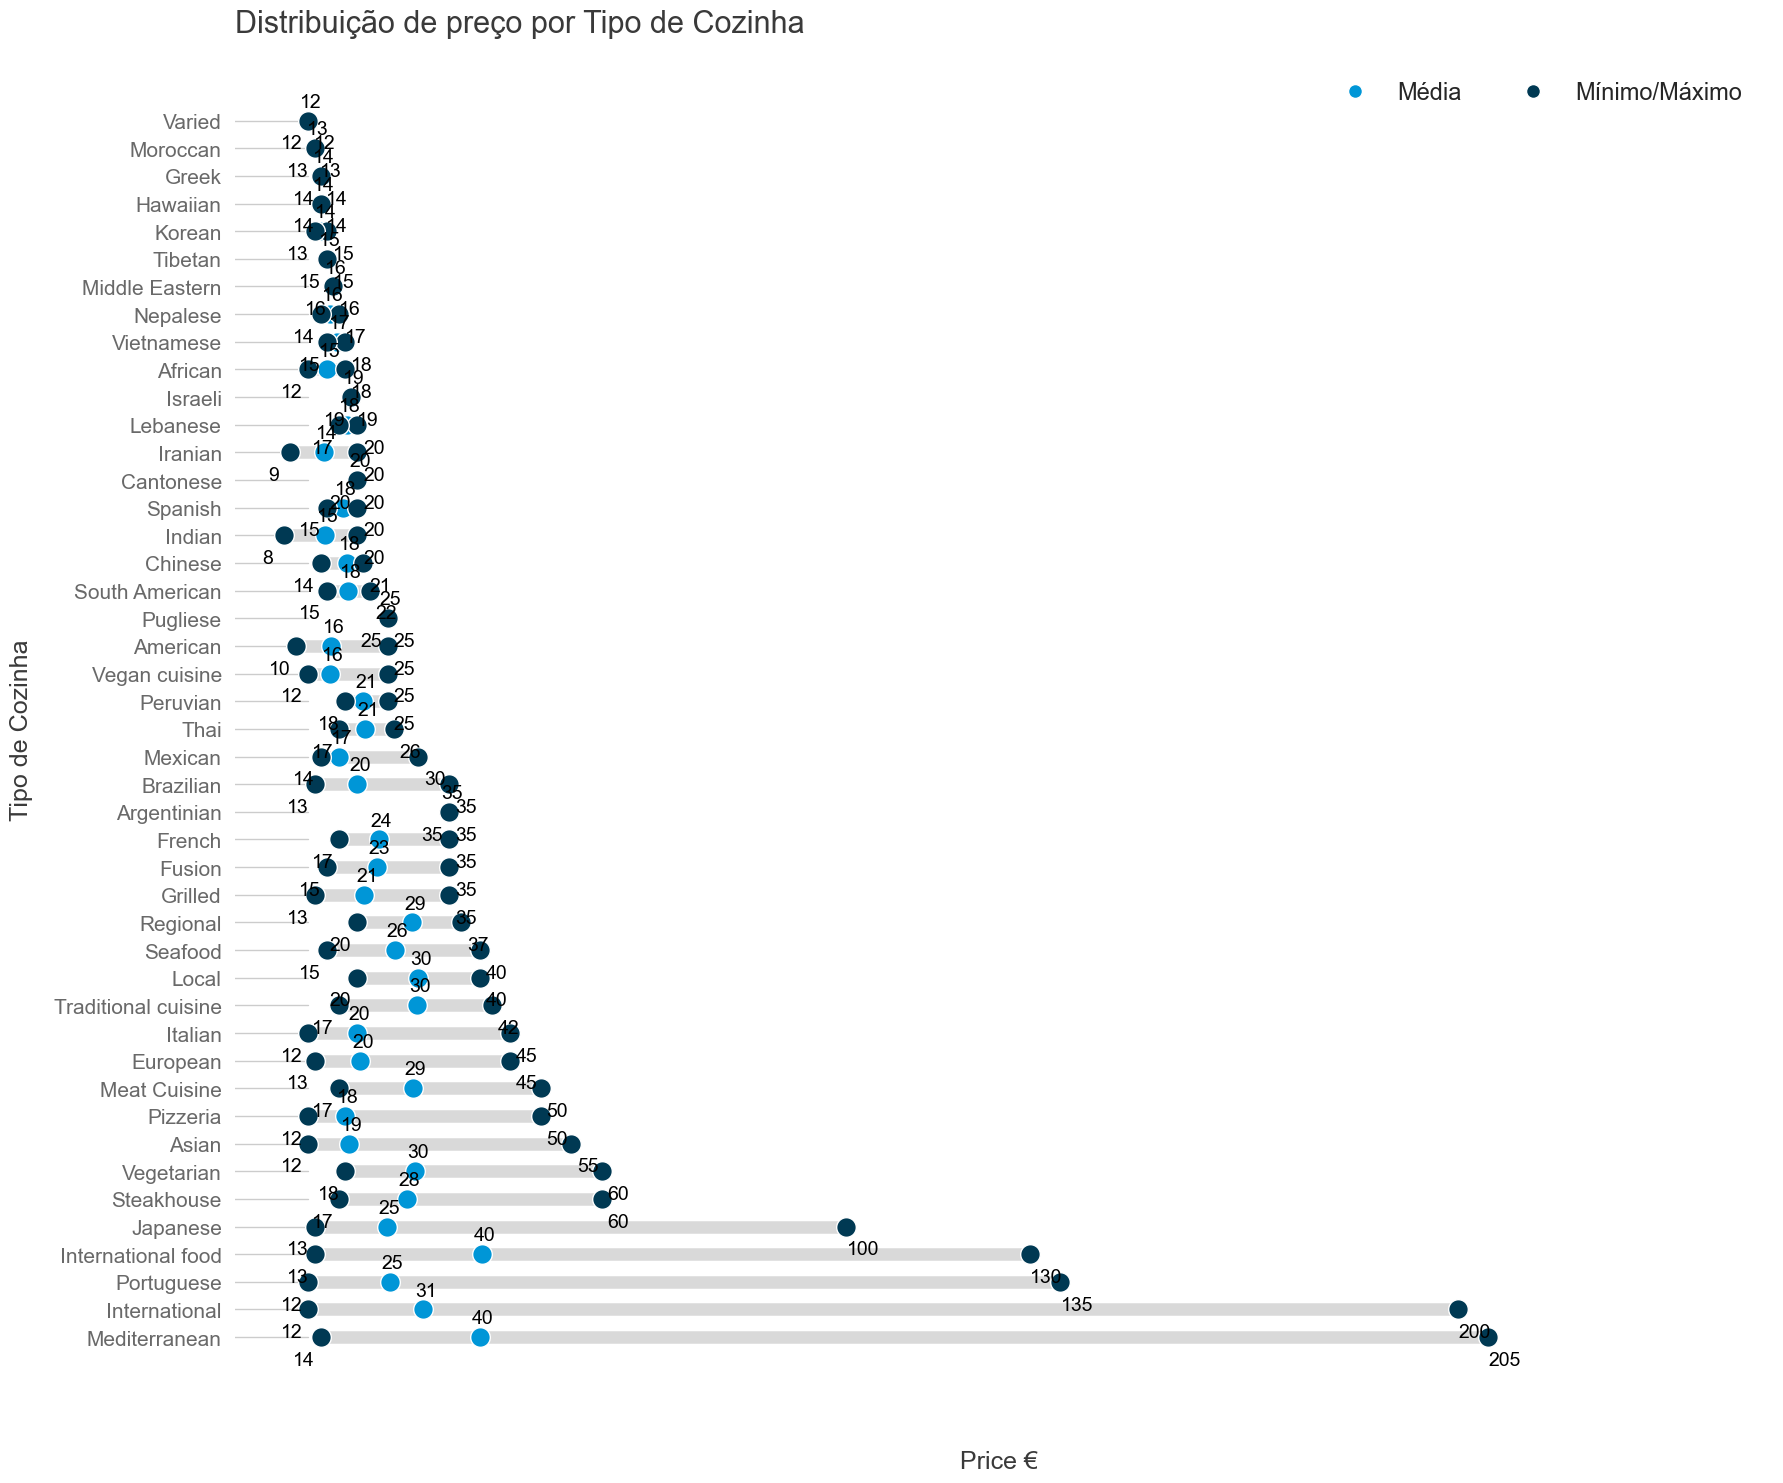

In [63]:
sns.set(style="white")  
df = filtered2.groupby('cuisine')['averagePrice'].agg(['min', 'mean', 'max']).sort_values(by='max', ascending=False)

plt.figure(figsize=(18, 15))
y_range = np.arange(1, len(df.index) + 1)
colors = np.where(df['max'] > df['mean'], '#d9d9d9', '#d57883')
main_text = '#3A3A3A'

plt.hlines(y=y_range, xmin=df['max'], xmax=df['mean'],
           color=colors, lw=9)
plt.hlines(y=y_range, xmin=df['min'], xmax=df['mean'],
           color=colors, lw=9)

for i in range(1, df.shape[0]+1):
    plt.plot([-2, 12], [i,i], linewidth=1, color='grey', alpha=0.4, zorder=0)
   
    
plt.scatter(df['mean'], y_range, color='#0096d7', s=200, label='Média', zorder=3, edgecolors='white')


plt.scatter(df['max'], y_range, color='#003953', s=200, label='Máximo', zorder=3, edgecolors='white')

plt.scatter(df['min'], y_range, color='#003953', s=200, label='Mínimo', zorder=3, edgecolors='white')

for mean_val, y in zip(df['mean'], y_range):
    plt.annotate(f'{mean_val:.0f}', (mean_val, y), textcoords="offset points",
                 xytext=(2, 10), ha='center', fontsize=14, color='black')

for max_val, y in zip(df['max'], y_range):
    plt.annotate(f'{max_val:.0f}', (max_val, y), textcoords="offset points",
                 xytext=(12, -20), ha='center', fontsize=14, color='black')

for min_val, y in zip(df['min'], y_range):
    plt.annotate(f'{min_val:.0f}', (min_val, y), textcoords="offset points",
                 xytext=(-12, -20), ha='center', fontsize=14, color='black')

legend_labels = ['Média', 'Mínimo/Máximo']
legend_markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#0096d7', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#003953', markersize=10)]
plt.legend(legend_markers, legend_labels, ncol=2, bbox_to_anchor=(1., 1.), loc="upper right", frameon=False, fontsize=17)


plt.yticks(y_range, [label.replace(' e ', '\ne ') for label in df.index], fontsize=15, color='dimgrey')

plt.title("Distribuição de preço por Tipo de Cozinha",
          loc='left', fontsize=22, pad=20,  fontname='Arial', weight='light', color=main_text, wrap=False)


plt.xlim(0, 250)
plt.xticks(np.arange(0, 250), fontsize=14, color='white')  

xlabel_text = plt.xlabel('Price €', labelpad=15, fontsize=18, color=main_text)
xlabel_text.set_position((0.5, -0.1))  
ylabel_text = plt.ylabel('Tipo de Cozinha', labelpad=15, fontsize=18, color=main_text)
ylabel_text.set_position((-0.1, 0.5))  
sns.despine(left=True, bottom=True)

# plt.gcf().subplots_adjust()
plt.tight_layout()

plt.show()


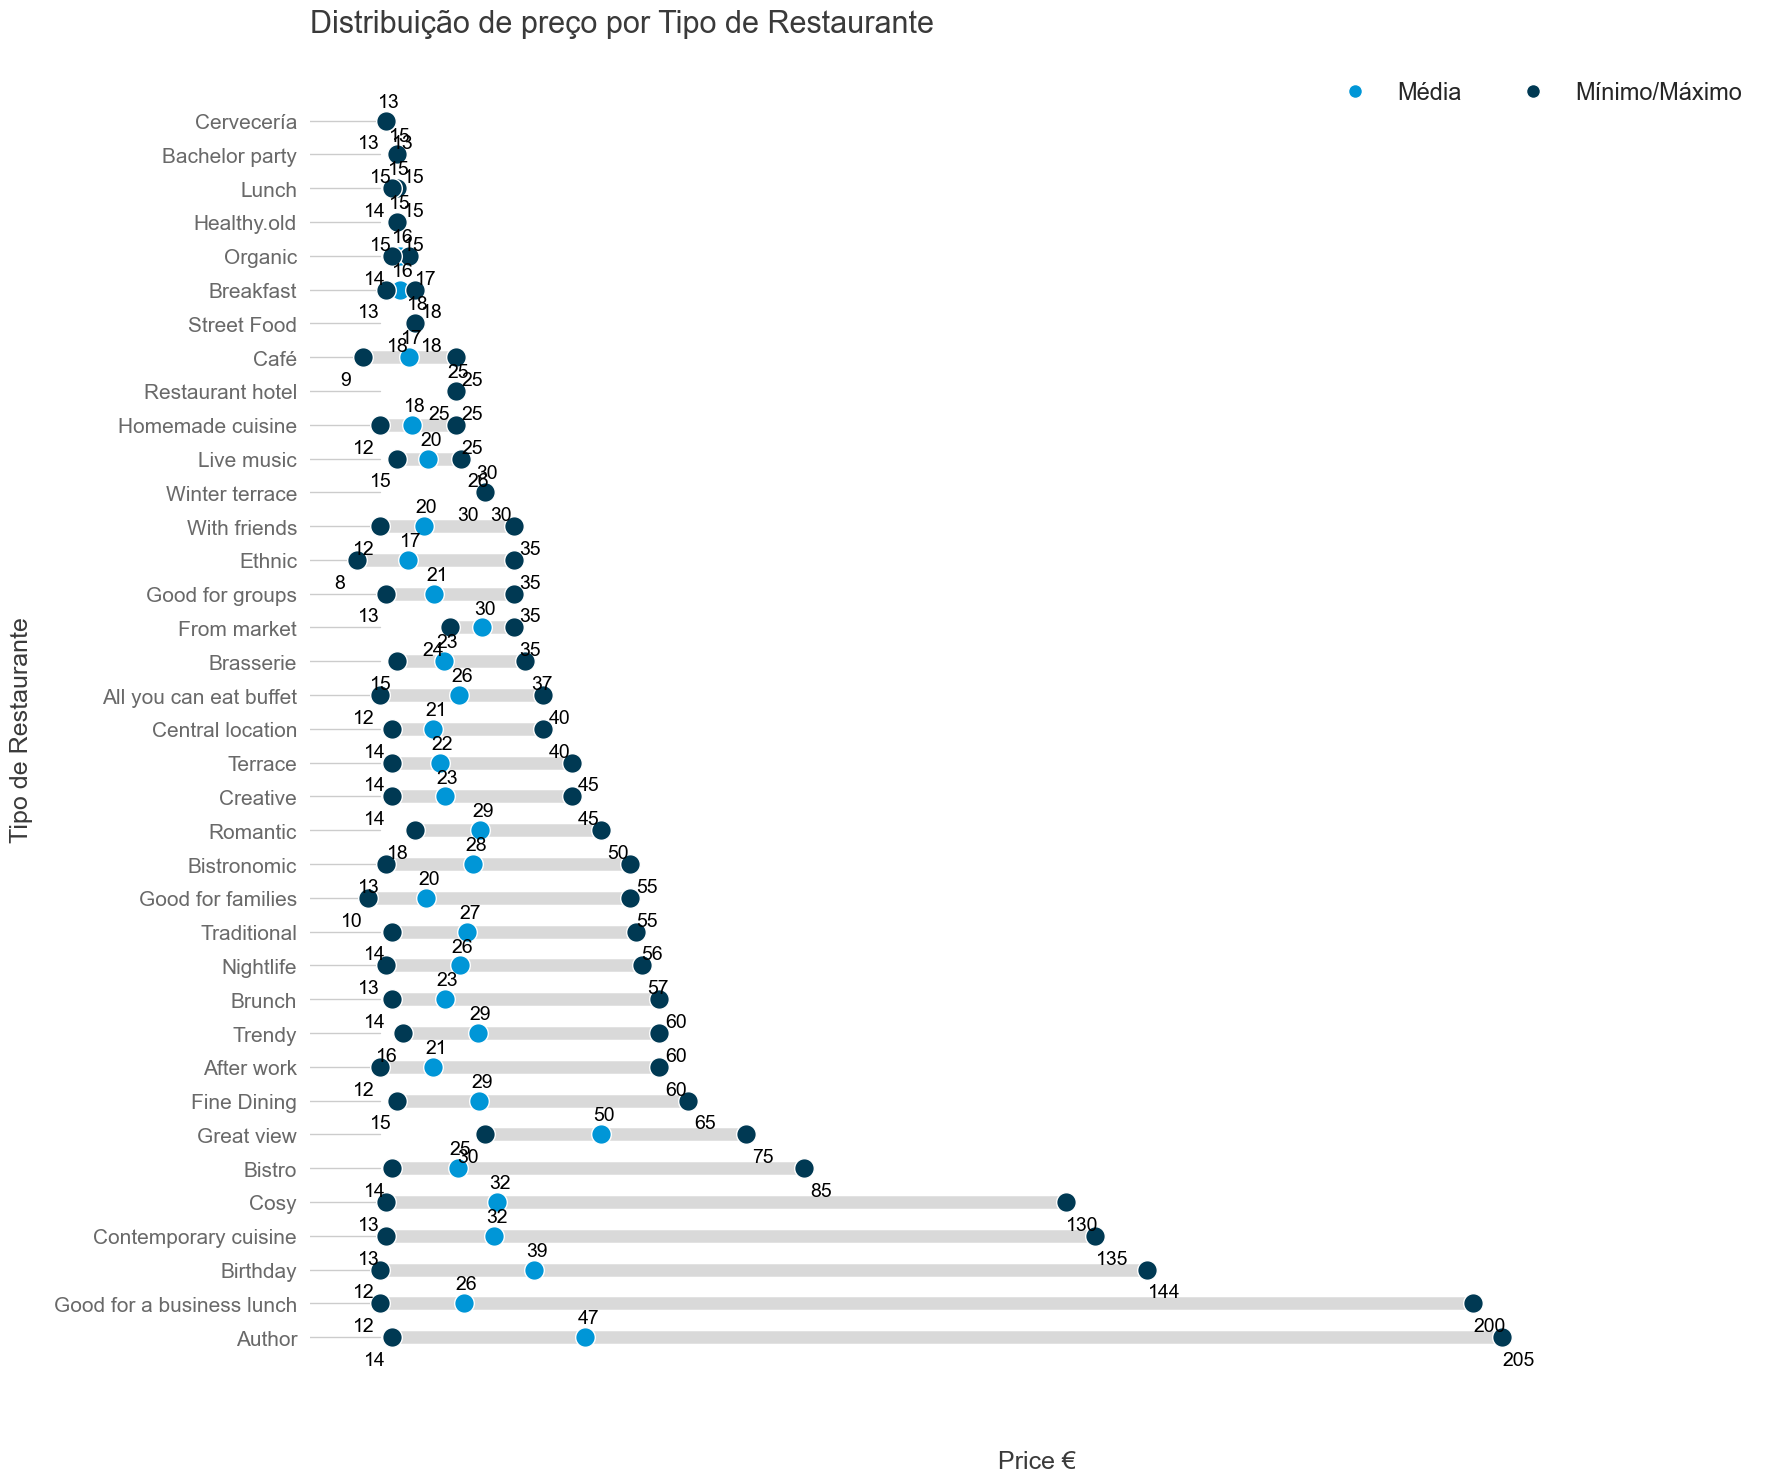

In [64]:
sns.set(style="white")  
df = filtered2.groupby('style')['averagePrice'].agg(['min', 'mean', 'max']).sort_values(by='max', ascending=False)

plt.figure(figsize=(18, 15))
y_range = np.arange(1, len(df.index) + 1)
colors = np.where(df['max'] > df['mean'], '#d9d9d9', '#d57883')
main_text = '#3A3A3A'

plt.hlines(y=y_range, xmin=df['max'], xmax=df['mean'],
           color=colors, lw=9)
plt.hlines(y=y_range, xmin=df['min'], xmax=df['mean'],
           color=colors, lw=9)

for i in range(1, df.shape[0]+1):
    plt.plot([-2, 12], [i,i], linewidth=1, color='grey', alpha=0.4, zorder=0)
   
    
plt.scatter(df['mean'], y_range, color='#0096d7', s=200, label='Média', zorder=3, edgecolors='white')


plt.scatter(df['max'], y_range, color='#003953', s=200, label='Máximo', zorder=3, edgecolors='white')

plt.scatter(df['min'], y_range, color='#003953', s=200, label='Mínimo', zorder=3, edgecolors='white')

for mean_val, y in zip(df['mean'], y_range):
    plt.annotate(f'{mean_val:.0f}', (mean_val, y), textcoords="offset points",
                 xytext=(2, 10), ha='center', fontsize=14, color='black')

for max_val, y in zip(df['max'], y_range):
    plt.annotate(f'{max_val:.0f}', (max_val, y), textcoords="offset points",
                 xytext=(12, -20), ha='center', fontsize=14, color='black')

for min_val, y in zip(df['min'], y_range):
    plt.annotate(f'{min_val:.0f}', (min_val, y), textcoords="offset points",
                 xytext=(-12, -20), ha='center', fontsize=14, color='black')

legend_labels = ['Média', 'Mínimo/Máximo']
legend_markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#0096d7', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#003953', markersize=10)]
plt.legend(legend_markers, legend_labels, ncol=2, bbox_to_anchor=(1., 1.), loc="upper right", frameon=False, fontsize=17)


plt.yticks(y_range, [label.replace(' e ', '\ne ') for label in df.index], fontsize=15, color='dimgrey')

plt.title("Distribuição de preço por Tipo de Restaurante",
          loc='left', fontsize=22, pad=20,  fontname='Arial', weight='light', color=main_text, wrap=False)


plt.xlim(0, 250)
plt.xticks(np.arange(0, 250), fontsize=14, color='white')  

xlabel_text = plt.xlabel('Price €', labelpad=15, fontsize=18, color=main_text)
xlabel_text.set_position((0.5, -0.1))  
ylabel_text = plt.ylabel('Tipo de Restaurante', labelpad=15, fontsize=18, color=main_text)
ylabel_text.set_position((-0.1, 0.5))  
sns.despine(left=True, bottom=True)

# plt.gcf().subplots_adjust()
plt.tight_layout()

plt.show()


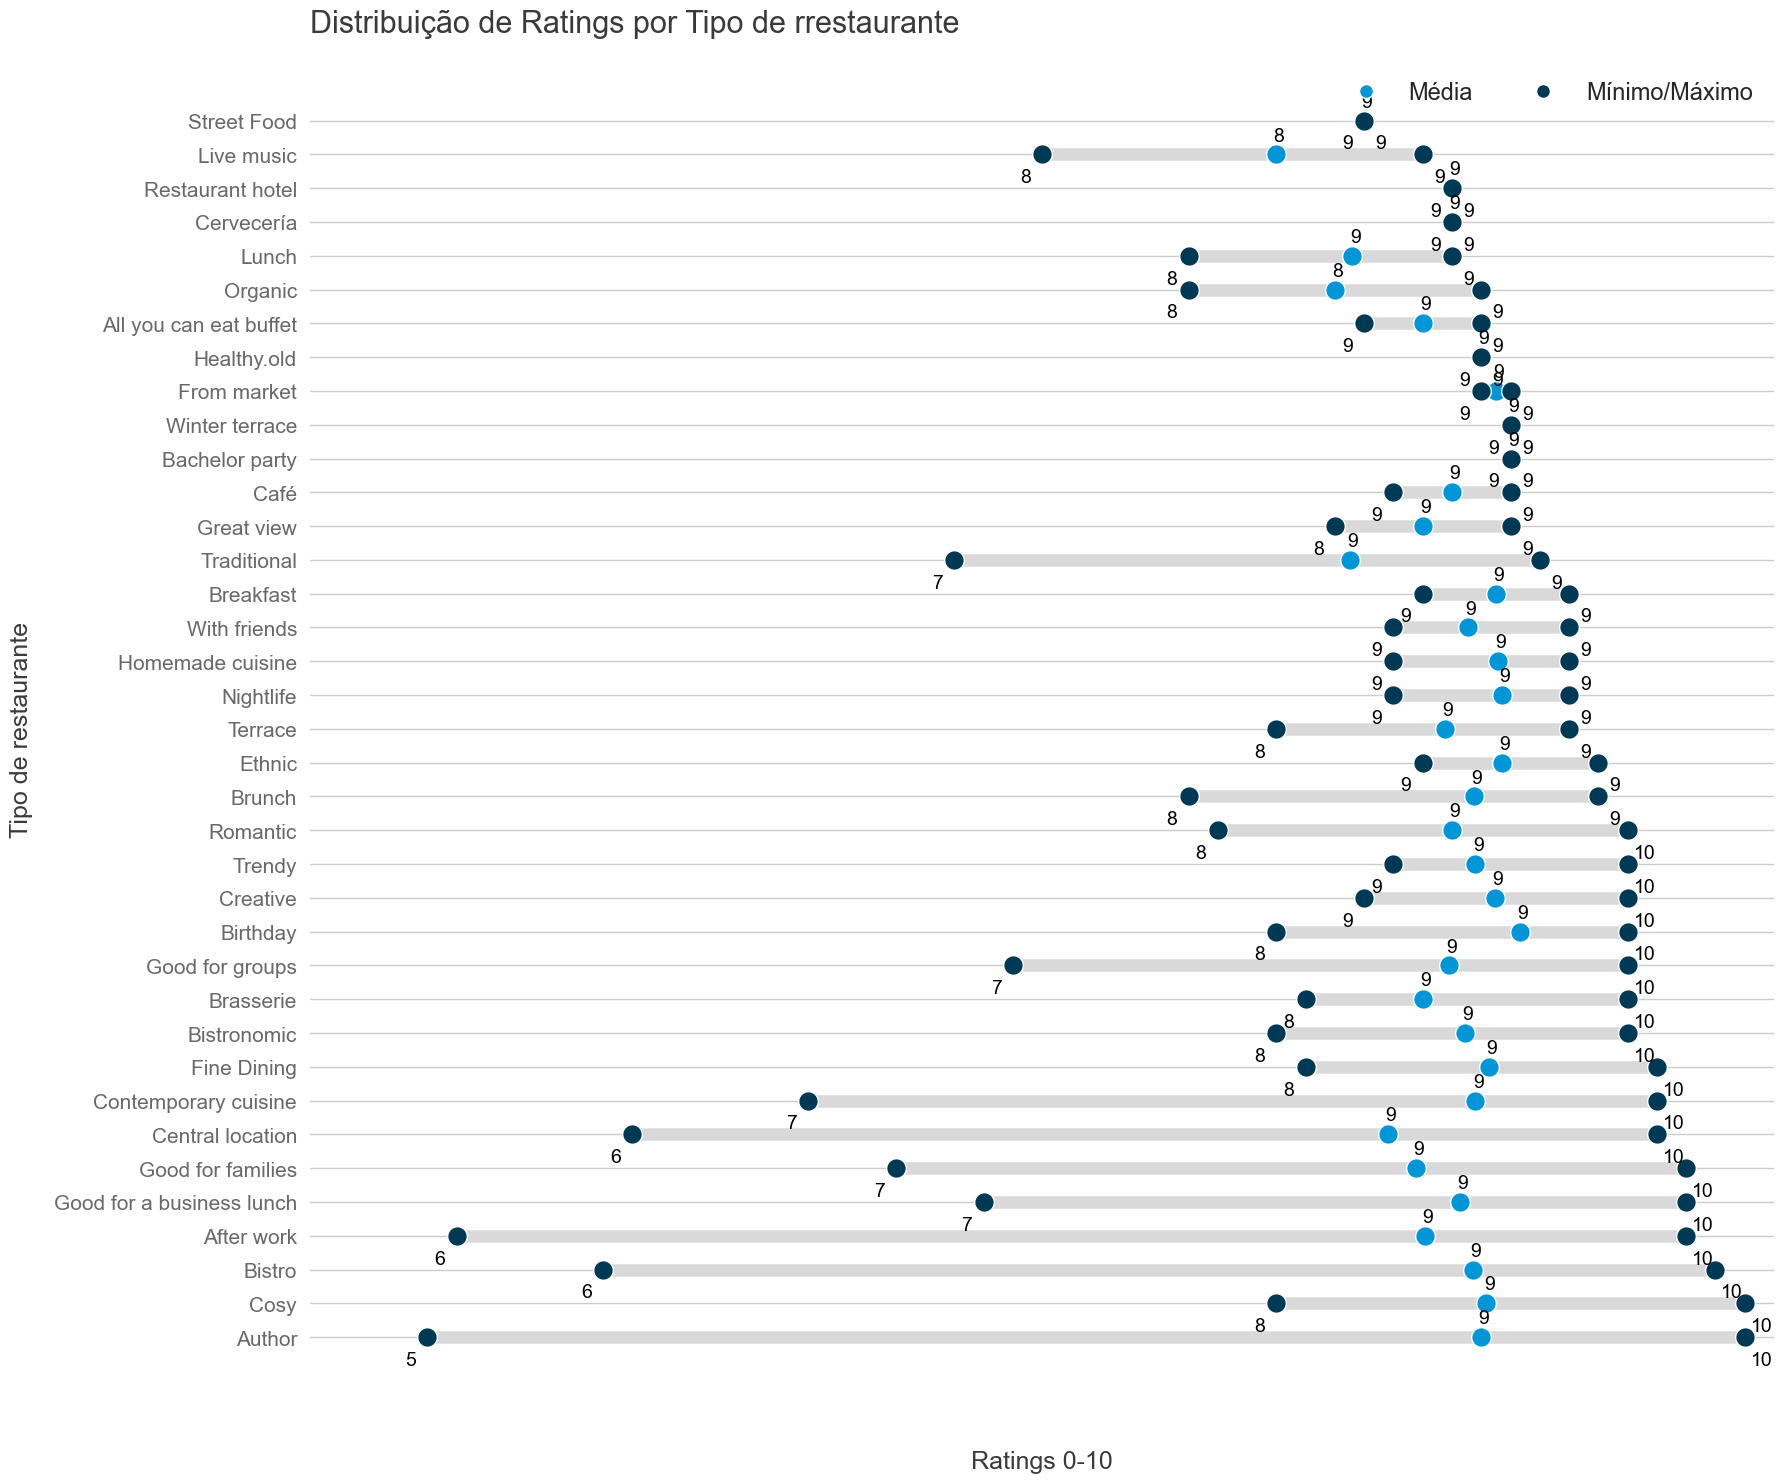

In [65]:
sns.set(style="white")  
df = filtered2.groupby('style')['ratingValue'].agg(['min', 'mean', 'max']).sort_values(by='max', ascending=False)

plt.figure(figsize=(18, 15))
y_range = np.arange(1, len(df.index) + 1)
colors = np.where(df['max'] > df['mean'], '#d9d9d9', '#d57883')
main_text = '#3A3A3A'

plt.hlines(y=y_range, xmin=df['max'], xmax=df['mean'],
           color=colors, lw=9)
plt.hlines(y=y_range, xmin=df['min'], xmax=df['mean'],
           color=colors, lw=9)

for i in range(1, df.shape[0]+1):
    plt.plot([-2, 12], [i,i], linewidth=1, color='grey', alpha=0.4, zorder=0)
   
    
plt.scatter(df['mean'], y_range, color='#0096d7', s=200, label='Média', zorder=3, edgecolors='white')


plt.scatter(df['max'], y_range, color='#003953', s=200, label='Máximo', zorder=3, edgecolors='white')

plt.scatter(df['min'], y_range, color='#003953', s=200, label='Mínimo', zorder=3, edgecolors='white')

for mean_val, y in zip(df['mean'], y_range):
    plt.annotate(f'{mean_val:.0f}', (mean_val, y), textcoords="offset points",
                 xytext=(2, 10), ha='center', fontsize=14, color='black')

for max_val, y in zip(df['max'], y_range):
    plt.annotate(f'{max_val:.0f}', (max_val, y), textcoords="offset points",
                 xytext=(12, -20), ha='center', fontsize=14, color='black')

for min_val, y in zip(df['min'], y_range):
    plt.annotate(f'{min_val:.0f}', (min_val, y), textcoords="offset points",
                 xytext=(-12, -20), ha='center', fontsize=14, color='black')

legend_labels = ['Média', 'Mínimo/Máximo']
legend_markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#0096d7', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#003953', markersize=10)]
plt.legend(legend_markers, legend_labels, ncol=2, bbox_to_anchor=(1., 1.), loc="upper right", frameon=False, fontsize=17)


plt.yticks(y_range, [label.replace(' e ', '\ne ') for label in df.index], fontsize=15, color='dimgrey')

plt.title("Distribuição de Ratings por Tipo de rrestaurante",
          loc='left', fontsize=22, pad=20,  fontname='Arial', weight='light', color=main_text, wrap=False)


plt.xlim(5, 10)
plt.xticks(np.arange(5, 10), fontsize=14, color='white')  

xlabel_text = plt.xlabel('Ratings 0-10', labelpad=15, fontsize=18, color=main_text)
xlabel_text.set_position((0.5, -0.1))  
ylabel_text = plt.ylabel('Tipo de restaurante', labelpad=15, fontsize=18, color=main_text)
ylabel_text.set_position((-0.1, 0.5))  
sns.despine(left=True, bottom=True)

# plt.gcf().subplots_adjust()
plt.tight_layout()

plt.show()


In [69]:
filtered

,address,averagePrice,chefName,cuisine,ratingValue,reviewCount,style,phone,photo,hasLoyaltyProgram,isBookable,location,maxPartySize,name,offer,oH2,offerBool
0,"Rua Correia Teles - 56,1350-102,Lisboa",20,NA,Regional,9.1,904.0,After work,NaN,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",60.0,Moules & Gin Lisboa,30% off the 'a la carte' menu,"{'Monday': '-', 'Tuesday': '12:30 - 23:00', 'W...",1
1,"Rua Damasceno Monteiro - 106B,1170-113,Lisboa",18,NA,Pizzeria,9.7,6.0,Good for families,3.519201e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Il Pizzavendolo,50% off the 'a la carte' menu,"{'Monday': '16:00 - 23:30', 'Tuesday': '16:00 ...",1
2,"Calçada de São Vicente - 42,1100-213,Lisboa",25,NA,Portuguese,9.3,1181.0,After work,3.512189e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",4.0,Beco a Sério,-30% sobre a ementa!,"{'Monday': '19:00 - 23:00', 'Tuesday': '19:00 ...",1
3,"Rua Cruzes da Sé 5,1100-192,Lisboa",15,NA,Portuguese,8.8,1662.0,Live music,3.512189e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",4.0,Caso Sério,Promoção 30%,"{'Monday': '19:00 - 23:00', 'Tuesday': '19:00 ...",1
4,"Rua da Sociedade Farmacêutica - 20A,1150-340,L...",15,NA,Portuguese,9.1,1008.0,After work,3.519276e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",70.0,111 Vinhos - Marquês,50% off the 'a la carte' menu,"{'Monday': '-', 'Tuesday': '16:00 - 23:30', 'W...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,"R. da Oliveira ao Carmo, 47,1200-309,Lisboa",25,SANGUEDO,Portuguese,NaN,26.0,NaN,3.512109e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,False,"Lisbon, Portugal",55.0,Lábios de Mosto,Nenhuma oferta,"{'Monday': '16:00 - 01:00', 'Tuesday': '16:00 ...",0
864,"Av. Elias Garcia 147A,1050-102,Lisboa",15,NA,Asian,8.6,744.0,After work,3.512180e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",NaN,Seoul K BBQ,Nenhuma oferta,"{'Monday': '12:00 - 15:00, 19:00 - 23:00', 'Tu...",0
865,"Rua dos Lusiadas 68-72,1300-305,Lisboa",35,NA,Portuguese,8.8,1200.0,After work,3.512136e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",20.0,Solar dos Nunes,Nenhuma oferta,"{'Monday': '12:00 - 15:00, 19:00 - 22:30', 'Tu...",0
866,"Rua António Alçada Baptista - 5,1500-911,Lisboa",15,NA,International,9.0,165.0,After work,3.512115e+11,https://res.cloudinary.com/tf-lab/image/upload...,False,True,"Lisbon, Portugal",60.0,STAY by Upon Lisbon,Nenhuma oferta,"{'Monday': '12:30 - 22:30', 'Tuesday': '12:30 ...",0
